# Project C20 Kaggle - Most Expensive Footballers 2021
## Team member - Kirill Ryrmak


# All necessary imports

In [18]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential




# Initial changes with database and preprocessing

In [19]:
# Read the data
data = pd.read_csv('players.csv')
data

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2


In [4]:
#Removing the column "Unnamed:0" as it the dublicate of IDs of players
data = data.drop(columns = ["Unnamed: 0"])

In [5]:
# Using desribe method for calculating some statistical data like percentile, mean and so on of the numerical values of the Series or DataFrame.
data["Markey Value In Millions(£)"].describe()

count    500.000000
mean      31.537800
std       17.577697
min       16.200000
25%       19.800000
50%       25.200000
75%       36.000000
max      144.000000
Name: Markey Value In Millions(£), dtype: float64

In [6]:
#Group the data according to the country and counting the market value sum of each player and outputing the information 
# about most high valuation country
data_country = data.groupby(["Country"]).agg({"Markey Value In Millions(£)" : "sum"}).sort_values("Markey Value In Millions(£)",ascending = False).reset_index()
data_country

,Country,Markey Value In Millions(£)
0,England,2248.2
1,France,1895.4
2,Spain,1565.1
3,Brazil,1275.3
4,Germany,1005.3
5,Portugal,890.1
6,Italy,854.1
7,Argentina,650.7
8,Netherlands,571.5
9,Belgium,522.9


In [7]:
#Preprocessing data using get_dummies for 
data_dum = pd.get_dummies(data, columns = ["Position","Country","Club"])
data_dum

,Name,Age,Markey Value In Millions(£),Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,...,Club_UD Almería,Club_US Sassuolo,Club_Valencia CF,Club_VfB Stuttgart,Club_VfL Wolfsburg,Club_Villarreal CF,Club_Watford FC,Club_West Ham United,Club_Wolverhampton Wanderers,Club_Zenit St. Petersburg
0,Kylian Mbappé,22,144.0,16,7,0,11,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Erling Haaland,21,135.0,10,13,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Harry Kane,28,108.0,16,7,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jack Grealish,26,90.0,15,2,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mohamed Salah,29,90.0,15,15,0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Giorgian de Arrascaeta,27,16.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,Ayoze Pérez,28,16.2,8,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
497,Alex Meret,24,16.2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,Duje Caleta-Car,25,16.2,8,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
LE = LabelEncoder()
categorical =["Position","Country","Club"]
for key in categorical:
    transformed = LE.fit_transform(data[key])
    data[key] = transformed
data.head(3)

,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Kylian Mbappé,3,22,144.0,17,50,16,7,0,11,3,0,0,0,8
1,Erling Haaland,3,21,135.0,36,14,10,13,0,4,1,0,0,0,1
2,Harry Kane,3,28,108.0,16,69,16,7,0,2,2,0,0,2,2



# Creating different machine learning models

In [9]:
# Separate the columns "Name and Market value" cause no obligatory to standardizate them
player_names = data["Name"]
player_values = data["Markey Value In Millions(£)"]
data.drop(columns = ["Name","Markey Value In Millions(£)"],inplace = True)

SS =StandardScaler()
sc_x = SS.fit_transform(data)

X = pd.DataFrame(sc_x,columns = data.columns)
Y = player_values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 43)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(375, 13) (125, 13) (375,) (125,)


In [10]:
#Linear regression
linear = LinearRegression().fit(X_train, Y_train)
pred_linear = linear.predict(X_test)
pred_linear[pred_linear > 100] = 100
pred_linear[pred_linear < 0] = 0

mae_linear = mean_absolute_error(Y_test, pred_linear)
print ("Linear regression mean absolute error (MAE):", round(mae_linear,4))

Linear regression mean absolute error (MAE): 12.2678


In [11]:
#Lasso
lasso = Lasso().fit(X_train, Y_train)
pred_lasso = lasso.predict(X_test)
pred_lasso[pred_lasso > 100] = 100
pred_lasso[pred_lasso < 0] = 0

mae_lasso = mean_absolute_error(Y_test, pred_lasso)
print ("Lasso mean absolute error (MAE):", round(mae_lasso,4))

Lasso mean absolute error (MAE): 12.0077


In [12]:
#K near neighbour regression
neighbors= KNeighborsRegressor().fit(X_train, Y_train)
pred_neighbors = neighbors.predict(X_test)
pred_neighbors[pred_neighbors > 100] = 100
pred_neighbors[pred_neighbors < 0] = 0

mae_neighbors = mean_absolute_error(Y_test, pred_neighbors)
print ("Nearest neighbors mean absolute error (MAE):", round(mae_neighbors,4))


Nearest neighbors mean absolute error (MAE): 13.3373


In [13]:
#fit and predict with linear regression
pred_linear = pd.DataFrame(pred_linear,columns = ["preds"],index = Y_test.index)

table = pd.concat([Y_test,pred_linear],axis = 1)
table = pd.concat([player_names[Y_test.index],table],axis = 1)
table

,Name,Markey Value In Millions(£),preds
17,Phil Foden,72.0,42.786472
127,Carlos Soler,36.0,33.455633
363,Orel Mangala,19.8,25.917040
82,Theo Hernández,45.0,42.431725
60,Thibaut Courtois,54.0,33.440830
...,...,...,...
147,Luis Alberto,36.0,31.881896
490,Gregor Kobel,16.2,36.602293
399,Aaron Ramsdale,18.0,34.278297
378,Jesse Lingard,19.8,29.490082


In [14]:
mse_error = mean_squared_error(table["Markey Value In Millions(£)"],table["preds"])
print(f"MSE Error : {mse_error}")

MSE Error : 259.282030362405



# Confusion matrix

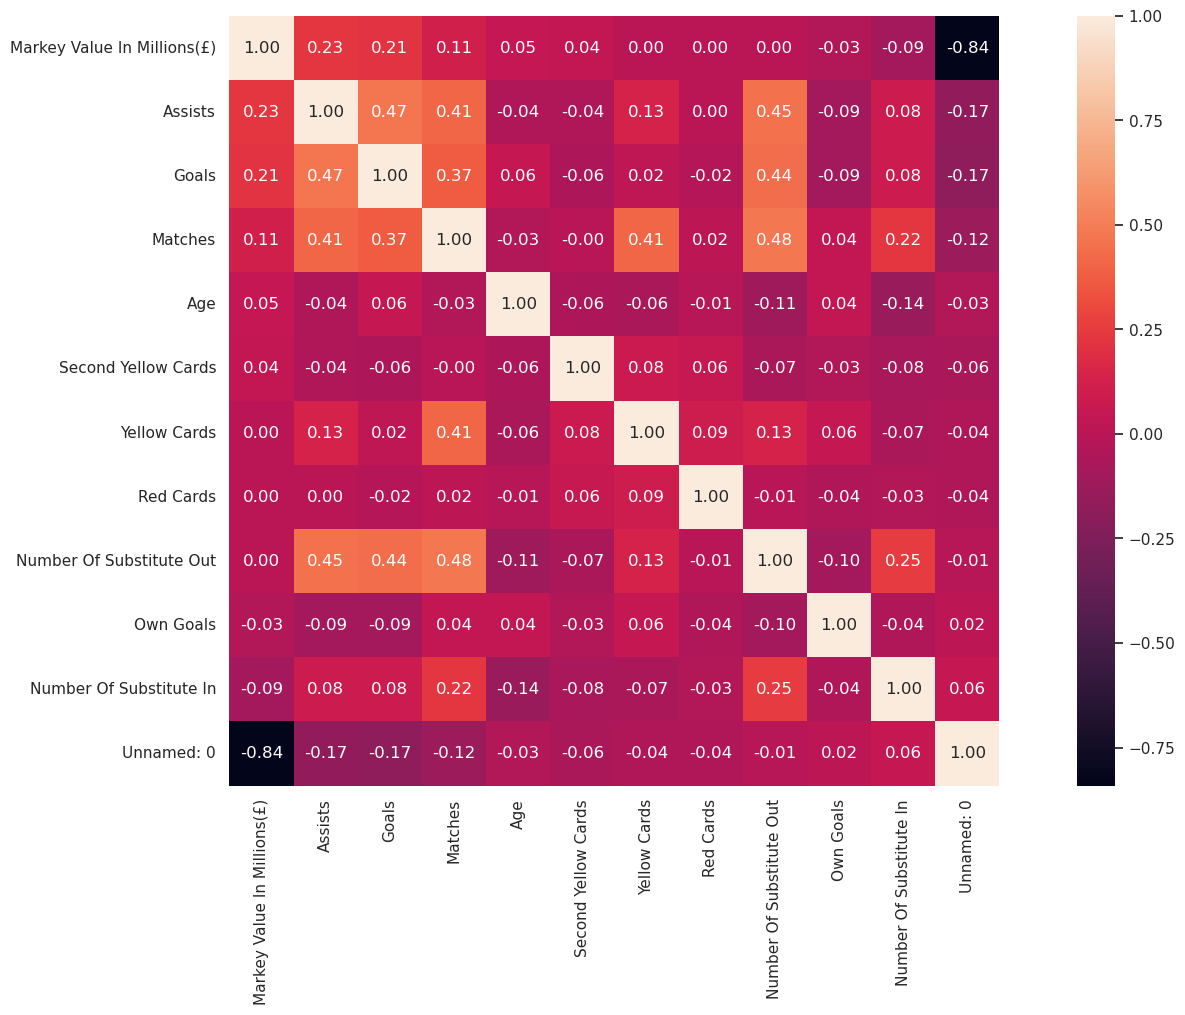

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

data_copy = data.copy()
data_copy.drop(columns = ["Name"],inplace = True)

corr_mat = data_copy.corr() 
k = len(data_copy.columns)

cols = corr_mat.nlargest(k, "Markey Value In Millions(£)")["Markey Value In Millions(£)"].index
cm = np.corrcoef(data_copy[cols].values.T)
sns.set(font_scale = 1)
plt.subplots(figsize = (20,10))
heat_map = sns.heatmap(cm,cbar = True,annot = True,square = True,fmt = ".2f",annot_kws = {"size" :12},
                      yticklabels = cols.values,xticklabels = cols.values)
plt.show()

In [21]:
# Trying to deal with neural networks
model = Sequential()


model.compile(loss="mean_squared_error", optimizer="sgd")


model.fit(X_train, Y_train, epochs=4, validation_data=(X_test, Y_test), batch_size=256, verbose=True)
y_pred = model.predict(X_test)




Epoch 1/4


2022-12-11 10:29:36.746263: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-11 10:29:36.746329: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-11 10:29:36.746368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a95192d0fbc8): /proc/driver/nvidia/version does not exist
2022-12-11 10:29:36.746840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 160ms/step - loss: 1352.9022 - val_loss: 1152.5681
Epoch 2/4
2/2 [==============================] - 0s 34ms/step - loss: 1352.9023 - val_loss: 1152.5681
Epoch 3/4
2/2 [==============================] - 0s 32ms/step - loss: 1352.9023 - val_loss: 1152.5681
Epoch 4/4
4/4 [==============================] - 0s 2ms/step


# Predicting for players who have most goals and costs much more 

In [22]:
market_value = data.drop(["Name", "Position","Country","Club"], axis = 1)
market_value

,Unnamed: 0,Age,Markey Value In Millions(£),Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,22,144.0,16,7,0,11,3,0,0,0,8
1,1,21,135.0,10,13,0,4,1,0,0,0,1
2,2,28,108.0,16,7,0,2,2,0,0,2,2
3,3,26,90.0,15,2,0,3,1,0,0,2,8
4,4,29,90.0,15,15,0,6,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,27,16.2,0,0,0,0,0,0,0,0,0
496,496,28,16.2,8,1,0,3,0,0,1,2,5
497,497,24,16.2,5,0,0,0,0,0,0,0,0
498,498,25,16.2,8,0,0,0,2,0,0,0,2


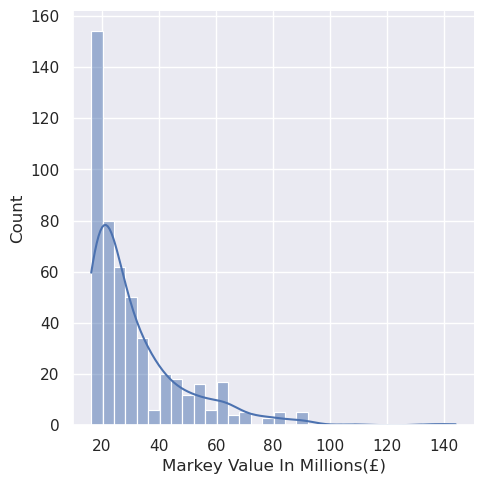

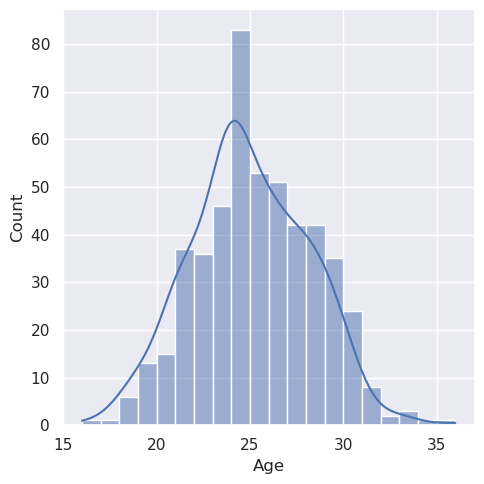

In [23]:
#Sketch the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(market_value, x="Markey Value In Millions(£)",kde=True)
sns.displot(market_value, x="Age", bins=20,kde=True)

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
market_value = sc.fit_transform(market_value)

In [25]:
values = []
for cluster in range(1,10):
    kmean = KMeans(n_clusters=cluster)
    kmean.fit_transform(market_value)
    values.append(kmean.inertia_)

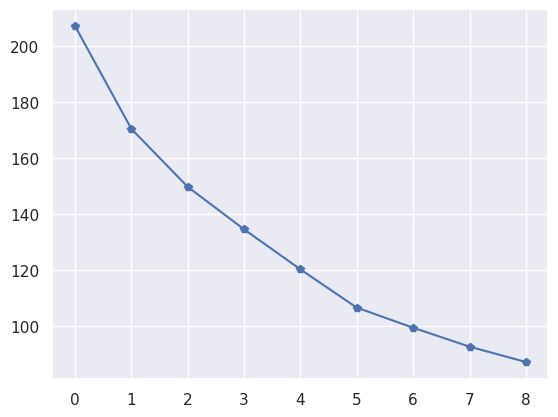

In [26]:
plt.plot(range(len(values)),values,marker = 'p')

In [27]:
kmean = KMeans(n_clusters=3)
predict = kmean.fit_predict(market_value)

In [28]:
data['predict'] = predict
max(data[data['predict'] == 0].Goals),min((data[data['predict'] == 0].Goals))

(15, 0)

In [29]:
# With 1 one predict labels we got correct table of players with the biggest amount of goals and their transfer value
data[data['predict'] == 1].Name

0             Kylian Mbappé
1            Erling Haaland
2                Harry Kane
3             Jack Grealish
4             Mohamed Salah
               ...         
271                    Gavi
278               Luis Díaz
283    Charles De Ketelaere
297                Noa Lang
314             Nabil Fekir
Name: Name, Length: 227, dtype: object

<AxesSubplot:xlabel='Method'>

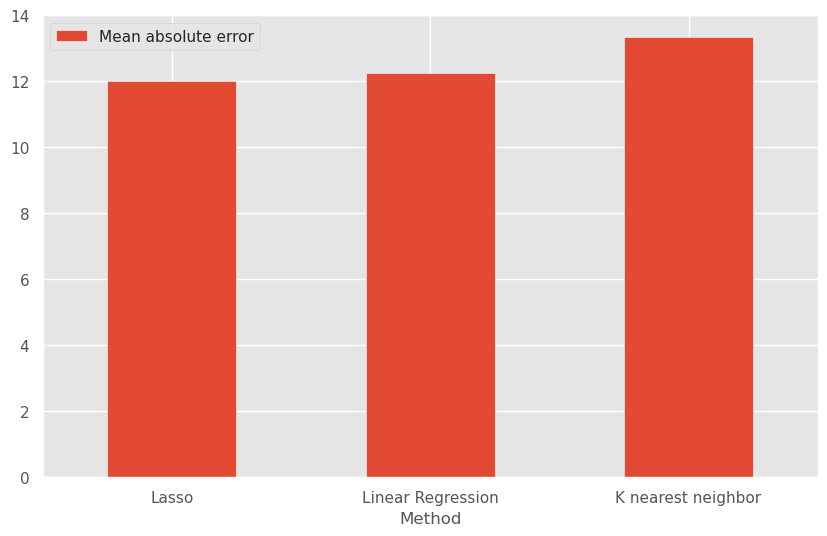

In [30]:
#Sketch the statistics of correctness of mean squared errors
import matplotlib
df_linear=round(mae_linear,4)
df_lasso=round(mae_lasso,4)
df_neighbors=round(mae_neighbors,4)

finalRes=[df_linear,df_lasso,df_neighbors]
titles=["Linear Regression","Lasso","K nearest neighbor"]

plt.rcParams['figure.figsize'] = (10,6)
matplotlib.style.use('ggplot')
fr=pd.DataFrame({'Method':titles, 'Mean absolute error':finalRes})
fr.sort_values('Mean absolute error',ascending=True).plot.bar(x='Method',y='Mean absolute error',rot=0)


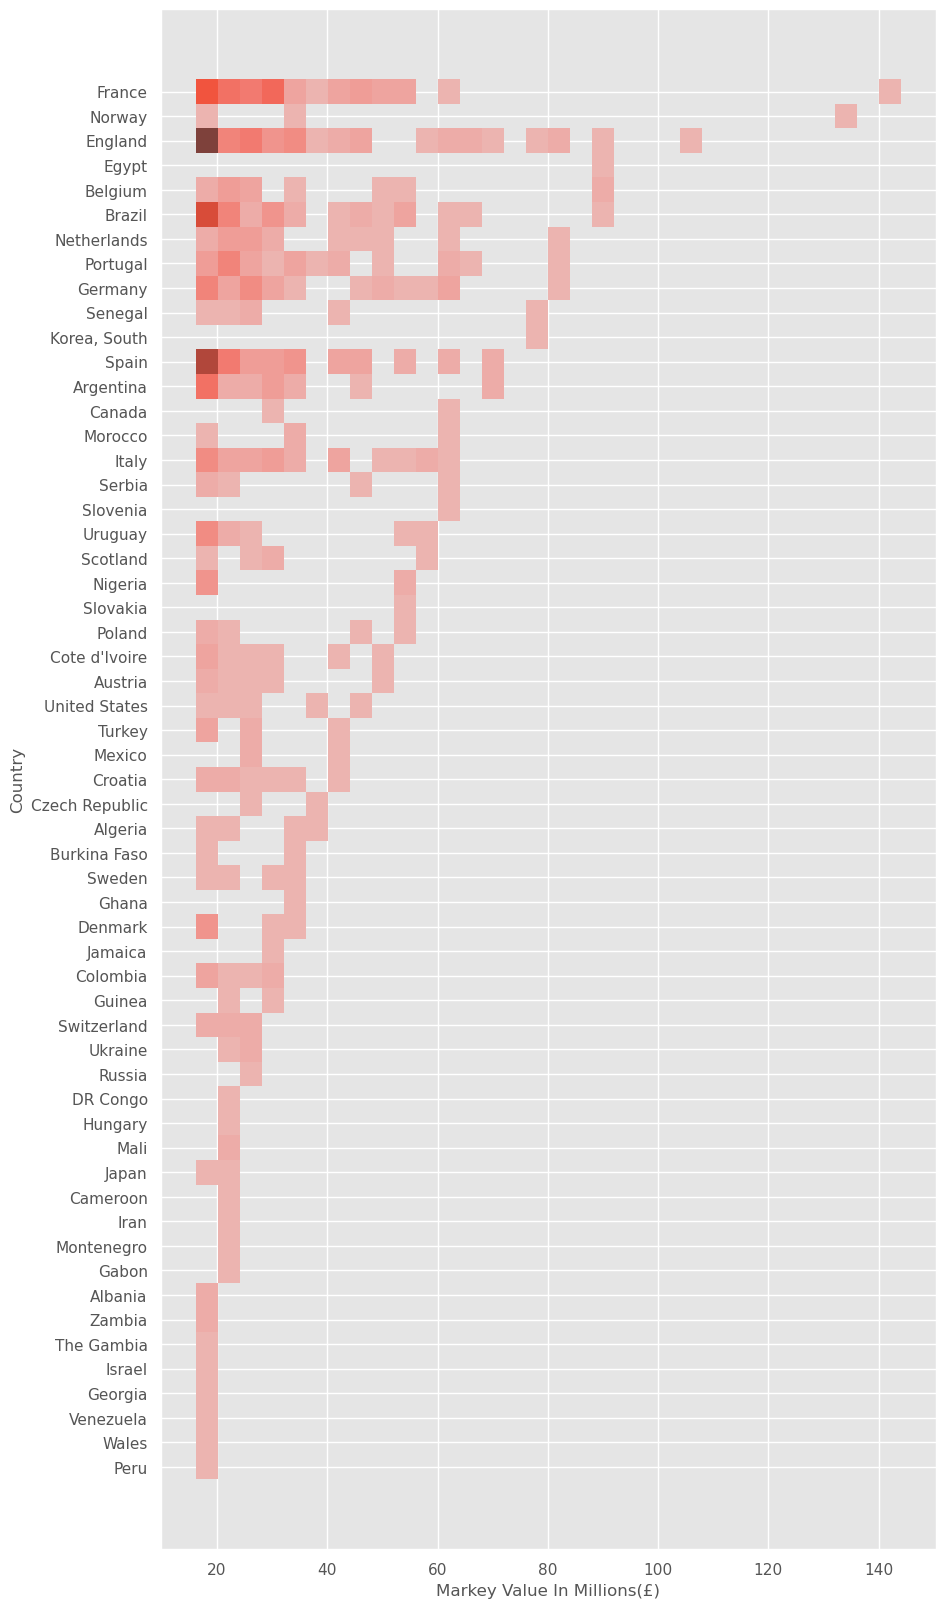

In [31]:
data_copy1 = data_copy.sort_values(by='Country')

plt.figure(figsize=(10,20))
ax = sns.histplot(x = 'Markey Value In Millions(£)', y = 'Country', data = data_copy)
plt.show()
